## Visualize Cell Types (CT) by Cell Type Annotation Tool (CTann)

## Goals

Build these visualizations:

1. Stacked bar graph with CTs on x, number of cells on y, stacked by CTann, for lung datasets in HRApop
2. Bar graph that shows agreement between CTann

## Install and import libraries

In [9]:
%pip install requests pandas seaborn matplotlib

import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Note: you may need to restart the kernel to use updated packages.


## Global variables

In [3]:
hra_pop_version = 'v0.11.1'

## Load data

In [ ]:
#  A table with CT by CTann tool:
df_lung_ctann_cell_summaries= pd.read_csv(f'https://raw.githubusercontent.com/x-atlas-consortia/hra-pop/refs/heads/main/output-data/{hra_pop_version}/reports/atlas-ad-hoc/lung-ctann-cell-summaries.csv')
df_lung_ctann_cell_summaries

,tool,cell_id,cell_label,count,avg_percentage_of_total
0,azimuth,http://purl.obolibrary.org/obo/CL_4028002,EC general capillary,1067664,0.183314
1,azimuth,http://purl.obolibrary.org/obo/CL_0002062,AT1,692194,0.149474
2,azimuth,http://purl.obolibrary.org/obo/CL_0002063,AT2,330530,0.150459
3,azimuth,http://purl.obolibrary.org/obo/CL_0002145,Multiciliated (non-nasal),290708,0.048467
4,azimuth,http://purl.obolibrary.org/obo/CL_0000624,CD4 T cells,202292,0.046190
...,...,...,...,...,...
141,popv,http://purl.obolibrary.org/obo/CL_0017000,pulmonary ionocyte,56,0.000247
142,popv,http://purl.obolibrary.org/obo/CL_0000784,plasmacytoid dendritic cell,42,0.000483
143,popv,http://purl.obolibrary.org/obo/CL_0000071,blood vessel endothelial cell,18,0.000174
144,popv,http://purl.obolibrary.org/obo/CL_0000192,smooth muscle cell,16,0.001355


In [7]:
#  for vis 2
df_lung_dataset_cell_summaries_by_ctann = pd.read_csv(f'https://raw.githubusercontent.com/x-atlas-consortia/hra-pop/refs/heads/main/output-data/{hra_pop_version}/reports/atlas-ad-hoc/lung-dataset-cell-summaries-by-ctann.csv')
df_lung_dataset_cell_summaries_by_ctann

,dataset,tool,cell_id,cell_label,count,percentage_of_total
0,https://api.cellxgene.cziscience.com/dp/v1/col...,azimuth,http://purl.obolibrary.org/obo/CL_0002063,AT2,838,0.168612
1,https://api.cellxgene.cziscience.com/dp/v1/col...,azimuth,http://purl.obolibrary.org/obo/CL_0002062,AT1,740,0.148893
2,https://api.cellxgene.cziscience.com/dp/v1/col...,azimuth,http://purl.obolibrary.org/obo/CL_0000583,Alveolar macrophages,697,0.140241
3,https://api.cellxgene.cziscience.com/dp/v1/col...,azimuth,http://purl.obolibrary.org/obo/CL_4028002,EC general capillary,473,0.095171
4,https://api.cellxgene.cziscience.com/dp/v1/col...,azimuth,http://purl.obolibrary.org/obo/CL_4028004,Alveolar fibroblasts,470,0.094567
...,...,...,...,...,...,...
5500,https://entity.api.sennetconsortium.org/entiti...,popv,http://purl.obolibrary.org/obo/CL_2000016,lung microvascular endothelial cell,4,0.001188
5501,https://entity.api.sennetconsortium.org/entiti...,popv,http://purl.obolibrary.org/obo/CL_0001050,"effector CD8-positive, alpha-beta T cell",4,0.001188
5502,https://entity.api.sennetconsortium.org/entiti...,popv,http://purl.obolibrary.org/obo/CL_0002393,intermediate monocyte,3,0.000891
5503,https://entity.api.sennetconsortium.org/entiti...,popv,http://purl.obolibrary.org/obo/CL_0002062,type I pneumocyte,2,0.000594


## Visualize

TypeError: Axis.set_ticklabels() missing 1 required positional argument: 'labels'

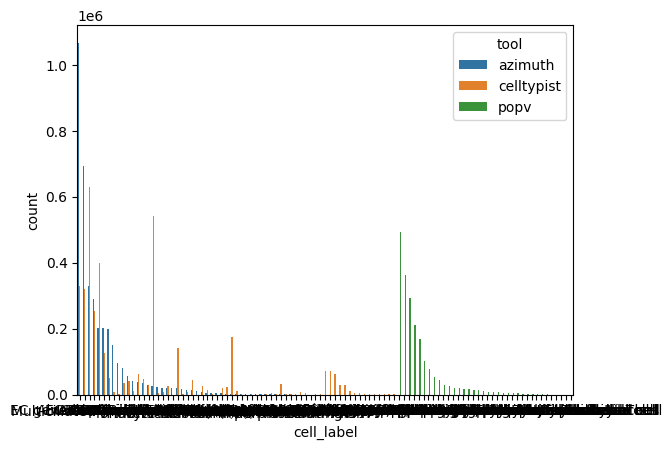

In [20]:
# Melt to long format
df_long = df_lung_ctann_cell_summaries.melt(id_vars=['cell_label','count', 'tool'], var_name='type', value_name='Value')
df_long

# Plot grouped bars
g = sns.barplot(data=df_long, x='cell_label', y='count', hue='tool')

g.set_xticklabels(rotation=90)